# Figure 1: Accuracy family

This notebook reproduces the figure panels for the Accuracy metric.


In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("..") / "src"))


## Parameters
Parameters match the paper; change only if exploring variants.


In [2]:
from pathlib import Path
from metric_paper.metrics import ReferencePoint, metric_matrices, reference_metrics
from metric_paper.plotting import (
    HeatmapPlotter,
    IsoCurvePlotter,
    build_curve_grid,
    build_ticks,
    set_plot_style,
)

positives = 500
negatives = 500
reference = ReferencePoint(tp=450, fp=90)
title = r"$\eta$ or $\mathrm{ipv}_{\mathrm{ref}}$"

out_dir = Path("..") / "figures"
out_dir.mkdir(exist_ok=True)

set_plot_style()


In [3]:
matrices = metric_matrices(positives, negatives)
ref_values = reference_metrics(positives, negatives, reference)

accuracy_matrix = {"Accuracy": matrices["Accuracy"]}
accuracy_ref = {"Accuracy": ref_values["Accuracy"]}


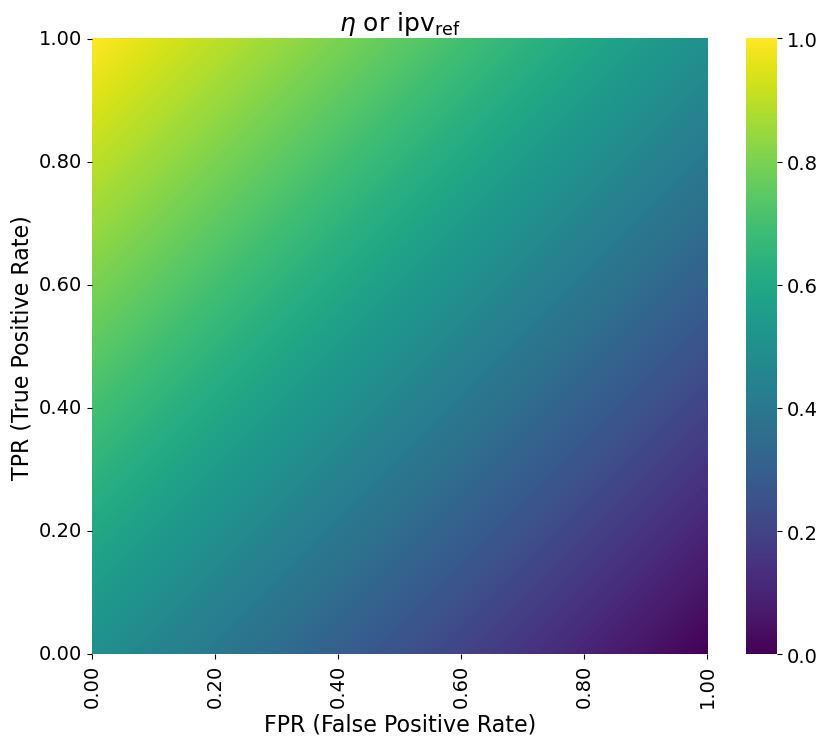

In [4]:
ticks = build_ticks(max_value=positives, steps=6)
heatmaps = HeatmapPlotter(ticks=ticks, title=title)
heatmap_path = out_dir / "fig1_accuracy_heatmap.svg"
heatmaps.plot_one(accuracy_matrix["Accuracy"], heatmap_path)


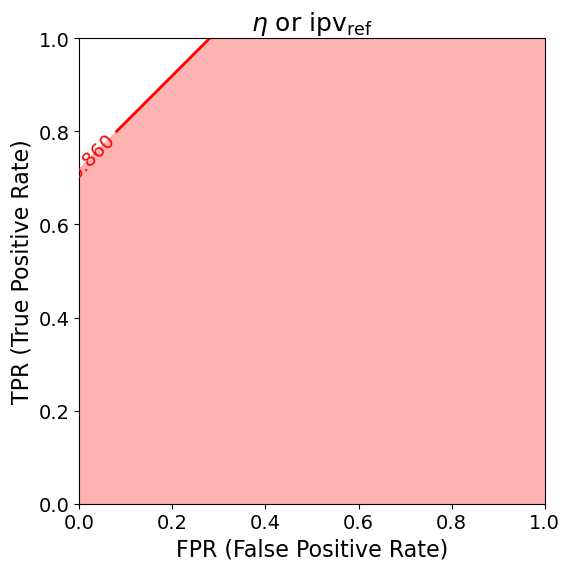

In [5]:
grid = build_curve_grid(positives, negatives)
curves = IsoCurvePlotter(grid=grid, title=title)
curve_path = out_dir / "fig1_accuracy_isocurve.svg"
curves.plot_one(accuracy_matrix["Accuracy"], accuracy_ref["Accuracy"], curve_path)


## Export
Figures are saved to `figures/` when you run the plotting cells.
